In [1]:
print('imports')
from matplotlib import pyplot as plt

from helpers import arr_helpers, misc_helpers
from helpers.io_helper import IO_Helper


RUN_SIZE = 'full'
SMALL_IO_HELPER = False
BIG_ARRAYS_FOLDER = 'arrays'


arr_names = [
    'posthoc_conformal_prediction_base_model_hgbr_y_pred_n210432_it5.npy',
    'posthoc_conformal_prediction_base_model_hgbr_y_quantiles_n210432_it5.npy',
    'posthoc_conformal_prediction_base_model_hgbr_y_std_n210432_it5.npy',
]

print('loading data')
X_train, y_train, X_val, y_val, X_test, y_test, X, y, scaler_y = misc_helpers._quick_load_data(RUN_SIZE)

if SMALL_IO_HELPER:
    io_helper = IO_Helper(arrays_folder='arrays_small', models_folder='models_small')
else:
    io_helper = IO_Helper(arrays_folder=BIG_ARRAYS_FOLDER)

print('loading arrs')
arrs = arr_helpers.load_arrs(arr_names, io_helper=io_helper)

n_samples_train = y_train.shape[0]
n_samples_val = y_val.shape[0]
arrs_train = map(lambda arr: arr[:n_samples_train], arrs)
arrs_test = map(lambda arr: arr[n_samples_train+n_samples_val:], arrs)

if len(arrs) > 1:
    y_pred, y_quantiles, y_std = arrs
    y_pred_train, y_quantiles_train, y_std_train = arrs_train
    y_pred_test, y_quantiles_test, y_std_test = arrs_test
else:
    y_pred, y_quantiles, y_std = next(iter(arrs)), None, None
    y_pred_train, y_quantiles_train, y_std_train = next(iter(arrs_train)), None, None
    y_pred_test, y_quantiles_test, y_std_test = next(iter(arrs_test)), None, None


y_train, y_test, y_val, y = misc_helpers.make_arrs_1d(y_train, y_test, y_val, y)
print('done')

imports
loading data


C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr.drop(columns=ts_cols, inplace=True)  # todo: works bc no ts cols present?
C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arr.drop(columns=ts_cols, inplace=True)  # todo: works bc no ts cols present?
C:\Users\Mischa\Desktop\Uni\Master\MA\code\my_code\helpers\misc_helpers.py:116: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://

loading arrs
done


In [49]:
print('imports')
from helpers._metrics import *
import settings

print('exec')

SETTINGS = [
    'asc',
    'desc',
    'sym',
]

LIM = 1000
PRINT_STEP = 10
y_test_mini, y_quantiles_test_mini = y_test[:LIM], y_quantiles_test[:LIM]
quantiles = np.array(settings.QUANTILES)


R = np.arange(len(quantiles))

crps_scores_all = {}
pinball_scores_all = {}
for setting in SETTINGS:
    print(setting)
    crps_scores = []
    pinball_scores = []
    iter_lim = len(quantiles)
    if setting == 'sym':
        iter_lim //= 2
    for i in range(1, iter_lim):
        if setting == 'asc':
            cur_quantiles = quantiles[:i]
            cur_y_quantiles_test_mini = y_quantiles_test_mini[:, :i]
        elif setting == 'desc':
            cur_quantiles = quantiles[-i:]
            cur_y_quantiles_test_mini = y_quantiles_test_mini[:, -i:]
        else:
            idx = (R < i) | (R > R.max() - i)
            cur_quantiles = quantiles[idx]
            cur_y_quantiles_test_mini = y_quantiles_test_mini[:, idx]
        crps_score = crps(y_test_mini, cur_y_quantiles_test_mini)
        pinball_score = mean_pinball_loss(y_test_mini, cur_y_quantiles_test_mini, cur_quantiles)
        crps_scores.append(crps_score)
        pinball_scores.append(pinball_score)
        if i % PRINT_STEP == 0:
            print(f'{i}, {crps_score}, {pinball_score}')
    
    crps_scores_all[setting] = crps_scores
    pinball_scores_all[setting] = pinball_scores
    print(f'{setting} done')

imports
exec
asc
10, 253.5409870274991, 18.48959565425792
20, 202.27703464565843, 29.67350782867402
30, 173.53983608218073, 38.08551155817781
40, 153.89578086213814, 44.43286089156683
50, 139.12575462458702, 49.097898550367525
60, 127.381503702371, 52.27179780298311
70, 117.88973091609581, 54.06526394745862
80, 110.08645499241976, 54.442033375467666
90, 103.64642726745826, 53.2245471091995
asc done
desc
10, 216.83775783427572, 22.686781629782146
20, 170.77568673945672, 33.93806134971627
30, 146.38067834994936, 41.98758706821241
40, 130.78584502484625, 47.82597425107839
50, 119.93049456426822, 51.91477670037284
60, 112.10179050613294, 54.51287628703598
70, 106.46566123937743, 55.70059109327854
80, 102.49479161142034, 55.45999057115428
90, 99.91512294134331, 53.63911073433555
desc done
sym
10, 119.94525072832708, 20.588188642020036
20, 106.15364422321183, 31.805784589195145
30, 100.40256968818274, 40.0365493131951
40, 98.52892317579567, 46.12941757132261
sym done


saving
showing


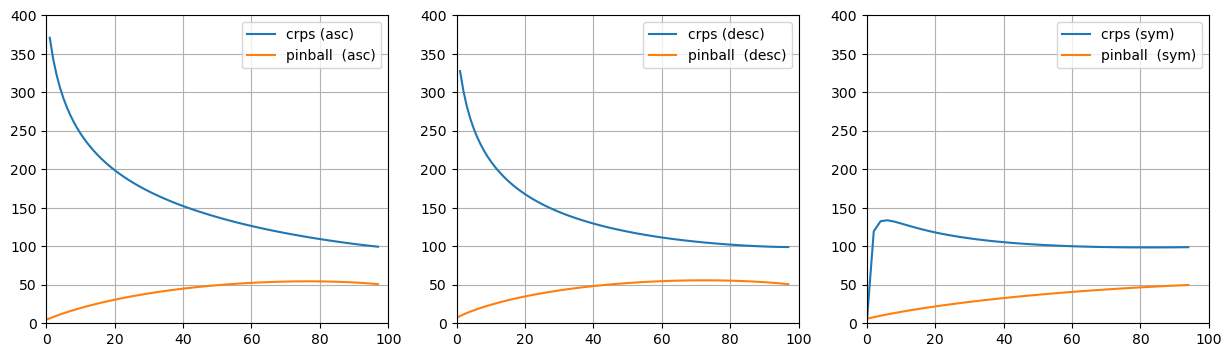

In [67]:
import matplotlib.pyplot as plt

FILEPATH = 'temp_crps_vs_pinball.png'

fig, axs = plt.subplots(1, 3, figsize=(15, 4))
for ax, setting in zip(axs, SETTINGS):
    crps_scores = crps_scores_all[setting]
    pinball_scores = pinball_scores_all[setting]
    x_plot = range(len(quantiles)-1) if setting != 'sym' else range(0, len(quantiles)-3, 2)
    ax.plot(x_plot, crps_scores, label=f'crps ({setting})')
    ax.plot(x_plot, pinball_scores, label=f'pinball  ({setting})')
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 400)
    ax.grid(True)
    ax.legend()

if FILEPATH is not None:
    print('saving')
    plt.savefig(FILEPATH)
print('showing')
plt.show()

In [78]:
print([list(values)[-1] for values in pinball_scores_all.values()])
print([float(list(values)[-1]) for values in crps_scores_all.values()])

[50.765466469403044, 50.78899108448558, 49.75339198519572]
[99.45897486332147, 98.999309473888, 98.8114854824067]
